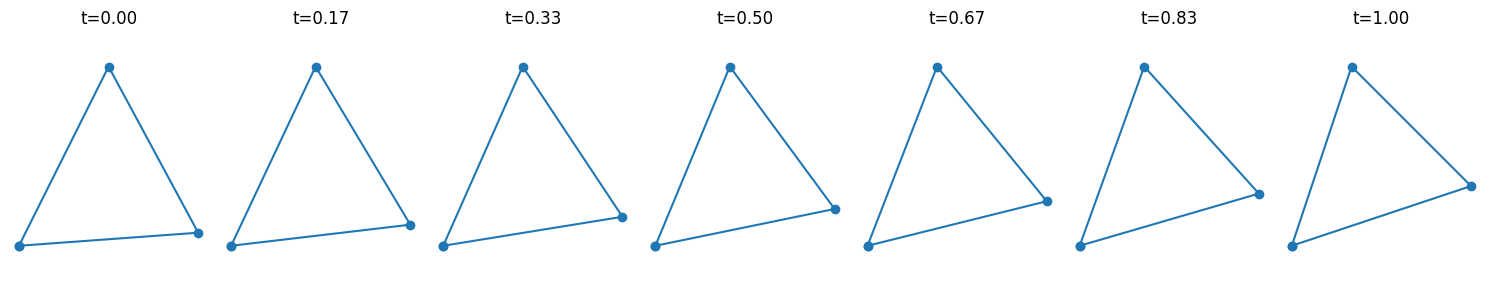

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

def find_corresponding_points(shape1,shape2): #find corresponding points between non-aligned shapes.
    tree=KDTree(shape2) 
    _, indices=tree.query(shape1) #find the closest point 
    return shape2[indices]


def interpolate_shapes_non_aligned(shape1,shape2,t):
    N=max(len(shape1),len(shape2)) #Ensure shape1 and shape2 have the same number of points
    shape1=resample_shape(shape1,N)
    shape2=resample_shape(shape2,N)

    aligned_shape2=find_corresponding_points(shape1,shape2)
    interpolated_shape=(1-t)*shape1+t*aligned_shape2 #linear interpolition
    return interpolated_shape

def resample_shape(shape,num_points):
    if not np.array_equal(shape[0],shape[-1]):
        shape=np.vstack([shape,shape[0]]) #Ensure the shape is closed
    perimeter=np.cumsum( #Calculate the distance each points
        np.sqrt(np.sum(np.diff(shape,axis=0)**2,axis=1))
    )
    perimeter=np.insert(perimeter,0,0) #first point
    total_perimeter=perimeter[-1]
    uniform_distances=np.linspace(0,total_perimeter,num_points) #calculate the distance new distance
    resampled_shape=np.zeros((num_points,2))
    for i in range(2):
        resampled_shape[:,i]=np.interp(uniform_distances,perimeter,shape[:,i])
    return resampled_shape

shape1 = np.array([[0, 0], [1, 0], [0.5, 1]])  # 三角形
shape2 = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])  # 四角形

fig,ax=plt.subplots(1,7,figsize=(15,3))
for i,t in enumerate(np.linspace(0,1,7)):
    interpolated=interpolate_shapes_non_aligned(shape1,shape2,t)
    ax[i].plot(interpolated[:,0],interpolated[:,1],'-o')
    ax[i].set_title(f"t={t:.2f}")
    ax[i].axis('equal')
    ax[i].axis('off')

plt.tight_layout()
plt.show()